<center><h1>Testing and Documentation Notebook for Cellular Automaton Using Inheritance from Numpy NDArray</h1></center>
<p>This document is for testing of a cellular automaton class which inherits much of its functionality from the Numpy module.  The class enables use of the array opperations (implemented in C) which should make the execution speed better.</p>
<h2>Initialization</h2>

In [1]:
from FireSimulation import *
from IPython.display import display
import inspect

from math import *
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

from matplotlib import animation
matplotlib.rc('animation', html='html5')

goldenratio=1/2*(1+sqrt(5))
fsx=7
fsy=fsx/goldenratio

def InfoDocString(function):
    """Function to return function definition and document string."""
    
    code = inspect.getsource(function)
    docstring = inspect.getdoc(function)
    return code[0:code.find(':')+1].lstrip() +'\n' + docstring

<h3>Functions to help with testing</h3>

In [2]:
MyDtype = numpy.dtype([('Tree', bool), ('Burning', bool), ('ProbImmune', 'f'), ('Value', 'f', (3,))])

def init(grid, rows, columns):
    for y in range(Rows):
        for x in range(Columns):
            grid['ProbImmune'][y][x]  = random()
            if random() < 0.75:
                MyGrid['Tree'][y][x]    = True
                MyGrid['Burning'][y][x] = random() < 0.1
            else:
                MyGrid['Tree'][y][x]    = False
                MyGrid['Burning'][y][x] = False
    grid.SetValue()
    grid.SetBoundary()

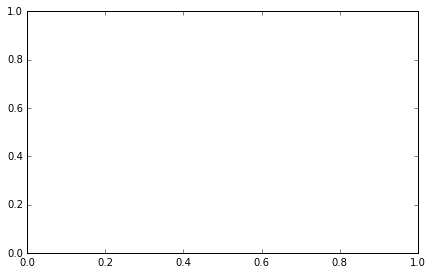

In [3]:
MyFigure, MyAxes = plt.subplots(1,1,figsize=(fsx,fsy))

<h2>Class Structure</h2>
<p>The class FireGrid inherts CAGird.</p>

In [4]:
print(InfoDocString(FireGrid))

class FireGrid(CAGrid):
This class derives from CAGrid and changes update to make this a first simulation


In [5]:
print(InfoDocString(FireGrid.Update))

def Update(self):
Update rules for a simple fire simulation


In [6]:
print(not True)

False


<h2>Test a 3 x 3 Behavior</h2>
<h3>Checker Board</h3>
<p>The checker board pattern should be stable.  All cells have exactly two neighbors.</p>

In [ ]:
rows = 3
columns = 3
MyGrid=CAGrid((rows,columns),MyDtype)
setstates(MyGrid, rows, columns, (0,1,0,1,0,1,0,1,0))
MyAxes.matshow(MyGrid['Value'])
MyFigure
print(MyGrid['State'])
print(MyGrid['Value'])

In [ ]:
MyAxes.matshow(MyGrid['Value'])
MyFigure

In [ ]:
MyGrid.Update()
MyAxes.matshow(MyGrid['Value'])
MyFigure

In [ ]:
MyGrid.Update()
print(MyGrid['State'])
print(MyGrid['Value'])

<h3>Line Continous</h3>
<p>With periodic boundary conditions, a continous line grows and then dies do to overpopulation.</p>

In [ ]:
rows = 3
columns = 3
MyGrid=CAGrid((rows,columns),MyDtype)
setstates(MyGrid, rows, columns, (0,0,0,1,1,1,0,0,0))
print(MyGrid['Value'])

In [ ]:
MyGrid.Update()
print(MyGrid['Value'])

In [ ]:
MyGrid.Update()
print(MyGrid['Value'])

<h3>Blinker</h3>
<p>If we surround the line with empty cells, it is a <a href = http://web.stanford.edu/~cdebs/GameOfLife/ >blinker</a>.</p>

In [ ]:
rows = 4
columns = 4
MyGrid=CAGrid((rows,columns),MyDtype)
setstates(MyGrid, rows, columns, (0,0,0,0, 0,1,1,1, 0,0,0,0, 0,0,0,0))
print(MyGrid['Value'])

In [ ]:
MyGrid.Update()
print(MyGrid['Value'])

In [ ]:
MyGrid.Update()
print(MyGrid['Value'])

In [ ]:
MyGrid.Update()
print(MyGrid['Value'])

<h2>Small Grid Animation Test</h2>

In [ ]:
def uf():
    MyGrid.Update()
    MyAxes.matshow(MyGrid['Value'])
    MyFigure

In [ ]:
def af(n):
    uf()

In [ ]:
rows = 25
columns = 50
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
MyGrid.FinishUpdate()
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(MyGrid['State'])

In [ ]:
AnimationFrames = 200  #total number of frames in animation.
DelayBetweenFrames = 33 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
af(1)
MyFigure

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h2>Glider Example</h2>
<h3>Small Grid Example</h3>
<p>A good test for the game of life simulation is if a <a href = http://web.stanford.edu/~cdebs/GameOfLife/ >glider</a> will act correctly. 

In [ ]:
rows = 5
columns = 5
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
numpy.copyto(MyGrid['State'],numpy.zeros((rows,columns),dtype=numpy.dtype(bool)))
MyGrid['State'][0][1] = True
MyGrid['State'][1][1] = True
MyGrid['State'][1][2] = True
MyGrid['State'][2][0] = True
MyGrid['State'][2][2] = True

MyGrid.FinishUpdate()
MyAxes.matshow(MyGrid['State'])
MyFigure

In [ ]:
AnimationFrames = 20  #total number of frames in animation.
DelayBetweenFrames = 1000 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h3>Large Grid Example</h3>
<h4>Up and to the right</h4>

In [ ]:
rows = 25
columns = 50
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
numpy.copyto(MyGrid['State'],numpy.zeros((rows,columns),dtype=numpy.dtype(bool)))
MyGrid['State'][0][1] = True
MyGrid['State'][1][1] = True
MyGrid['State'][1][2] = True
MyGrid['State'][2][0] = True
MyGrid['State'][2][2] = True

MyGrid.FinishUpdate()
MyAxes.matshow(MyGrid['State'])
MyFigure

In [ ]:
AnimationFrames = 250  #total number of frames in animation.
DelayBetweenFrames = 20 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h4>Down and to the left</h4>

In [ ]:
rows = 25
columns = 50
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
numpy.copyto(MyGrid['State'],numpy.zeros((rows,columns),dtype=numpy.dtype(bool)))
MyGrid['State'][5][10] = True
MyGrid['State'][6][10] = True
MyGrid['State'][6][11] = True
MyGrid['State'][7][9]  = True
MyGrid['State'][7][11] = True

MyGrid['State'][12][20] = True
MyGrid['State'][11][20] = True
MyGrid['State'][11][21] = True
MyGrid['State'][10][19] = True
MyGrid['State'][10][21] = True

MyGrid['State'][22][40] = True
MyGrid['State'][21][40] = True
MyGrid['State'][21][39] = True
MyGrid['State'][20][41] = True
MyGrid['State'][20][39] = True


MyGrid.FinishUpdate()
MyAxes.matshow(MyGrid['Value'])
MyFigure

In [ ]:
AnimationFrames = 100  #total number of frames in animation.
DelayBetweenFrames = 100 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

In [ ]:
MyAnimation.save('ThreeGliders.mp4')

<h2>Full Game of Life Simulations</h2>
<h3>Simulation 01</h3>

In [ ]:
rows = 50
columns = 75
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
MyGrid.FinishUpdate()
MyAxes.matshow(MyGrid['Value'])
MyFigure

In [ ]:
AnimationFrames = 1000  #total number of frames in animation.
DelayBetweenFrames = 33 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h3>Simulation 02</h3>

In [ ]:
rows = 75
columns = 115
MyGrid=CAGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
MyGrid.SetValue()
MyGrid.SetBoundary()
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(MyGrid['State'])

In [ ]:
AnimationFrames = 600  #total number of frames in animation.
DelayBetweenFrames = 33 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

In [ ]:
MyAnimationB = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimationB

In [ ]:
MyAnimationC = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimationC